FDR or Bonferroni correction

In [12]:
import pandas as pd
import numpy as np
# from scipy import stats
from sklearn.decomposition import PCA
import os
import glob
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
print(datetime.datetime.now().strftime('%Y-%m-%d'))

2024-06-18


## 1. (PAUSE) Combine GWAS output by lipid species or class for FDR correction

In [2]:
! head -n 3 /data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS/C1P.fastGWA


CHR	SNP	POS	A1	A2	N	AF1	BETA	SE	P
1	chr1:10930:G:A	10930	A	G	2096	0.00214695	0.10609	0.325155	0.744216
1	chr1:10989:G:A	10989	A	G	2096	0.000715649	-0.0329146	0.562377	0.953328


In [4]:
# Run in terminal
path = '/data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS'
output_dir = '/data100t1/home/wanying/CCHC/lipidomics/output/lipdomics_GWAS_combined_FDR_corrected/'
output_fn = 'lipid_class_bmi_age_age2_pc_sex.txt'
output_fn = os.path.join(output_dir, output_fn)
lst_fn = glob.glob(path+'/*.fastGWA')
for i, fn in enumerate(lst_fn):
    # Cols in the output: CHR	SNP	POS	A1	A2	N	AF1	BETA	SE	P
    cols_to_use = ['SNP', 'P']
    df = pd.read_csv(fn, sep='\t')[cols_to_use]
    df['TRAIT'] = fn.split('.fastGWA')[0].split('/')[-1]
    print(f'\r# Files processed: {i+1}')
    if os.path.isfile(output_fn):
        df.to_csv(output_fn, mode='a', sep='\t', index=False, header=False)
    else:
        df.to_csv(output_fn, mode='a', sep='\t', index=False)
print('\n# DONE')

C1P
AC
deDE
PS
Ubiquinone
S1P
PI
AC-OH
GM3
PE-O-
HexCer
DG
PE
TG-SIM-
Sph
LPI
LPC-P-
BA
PG
dimethyl-CE
dhCer
COH
LPE
GD1
DE
Cer-d-
PIP1
DG-O-
PE-P-
LPE-P-
methyl-DE
PC-P-
Hex3Cer
Cer-m-
Hex2Cer
CE
PC-O-
TG-O-_[NL]
TG_[NL]
SM
PC
PA
LPC
SHexCer
FFA
TG-O-
LPC-O-
methyl-CE
OxSpecies

# DONE


In [ ]:
# Perform FDR correction
path = '/data100t1/home/wanying/CCHC/lipidomics/output/lipdomics_GWAS_combined_FDR_corrected/'
in_fn = 'lipid_class_bmi_age_age2_pc_sex.fdr_pval.txt'
in_fn = os.path.join(path, output_fn)

df = pd.read_csv(in_fn,sep='\t')
df['P_FDR'] = df['P']

## 2. Bonferroni correction
FDR correction may not be feasible due to large file size.


### 2.1 Regular Bonferroni correction
Correct for number of tests

In [2]:
print(f'# Study-wide pval threshold is: {5e-8/(830+49):.4e}')


# Study-wide pval threshold is: 5.6883e-11


In [19]:
glob.glob('/data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS_snps_pval_1e-5/*.txt')[:2]

['/data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS_snps_pval_1e-5/TG-O-_[NL]_suggestive_sig_SNPs.txt',
 '/data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS_snps_pval_1e-5/Hex3Cer_suggestive_sig_SNPs.txt']

In [2]:
def filter_snp_by_pval_threshold(pval_threshold=5e-8/(830+49),
                                 path='/data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS_snps_pval_1e-5',
                                 output_fn='/data100t1/home/wanying/CCHC/lipidomics/output/lipidomics_GWAS_significant_SNPsa/lipid_class_bmi_age_age2_pc_sex.significant_SNPs.BF_corrected.txt',
                                 overwrite=False):
    '''
    Filter output of each lipid in the path
    Params
    - pval_threshold: for all lipid species and class the value is 5e-8/(830+49)=5.6883e-11
    - path: diorectory to search
    - output_fn: output file name
    - overwrite: whether to overwrite existing file
    '''
    if not overwrite and os.path.isfile(output_fn):
        print('# Output file already exists. Skip saving')
        return
    else:
        lst_fn = glob.glob(path+'/*.txt')
        for i, fn in enumerate(lst_fn):
            df = pd.read_csv(fn, sep='\t')
            lipid = fn.split('/')[-1].split('_suggestive')[0]
            df['TRAIT'] = lipid
            if not os.path.isfile(output_fn):
                # Save header only of the first file
                df[df['P']<=pval_threshold].to_csv(output_fn, sep='\t', index=False)
            else:
                df[df['P']<=pval_threshold].to_csv(output_fn, sep='\t', index=False, header=False, mode='a')
            print(f'\r# Number of files processed: {i+1}/{len(lst_fn)}    ', end='', flush=True)
    print('\n# DONE')

In [6]:
# On results from model: trait ~ SNP + sex + age + PC1-5 (No BMI and age2)
# Lipid class
filter_snp_by_pval_threshold(pval_threshold=5e-8/(830+49),
                             path='/data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS_noadj_BMI_AGE2_snps_pval_1e-5',
                             output_fn='/data100t1/home/wanying/CCHC/lipidomics/output/lipidomics_GWAS_significant_SNPs/lipid_class_age_sex_pc.significant_SNPs.BF_corrected.txt',
                             overwrite=False)
# Lipid species
filter_snp_by_pval_threshold(pval_threshold=5e-8/(830+49),
                             path='/data100t1/home/wanying/CCHC/lipidomics/output/lip_species_GWAS_noadj_BMI_AGE2_snps_pval_1e-5',
                             output_fn='/data100t1/home/wanying/CCHC/lipidomics/output/lipidomics_GWAS_significant_SNPs/lipid_species_age_sex_pc.significant_SNPs.BF_corrected.txt',
                             overwrite=False)

# Number of files processed: 48/48    
# DONE
# Number of files processed: 830/830    
# DONE


In [ ]:
# Lipid class
filter_snp_by_pval_threshold(pval_threshold=5e-8/(830+49),
                             path='/data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS_snps_pval_1e-5',
                             output_fn='/data100t1/home/wanying/CCHC/lipidomics/output/lipidomics_GWAS_significant_SNPs/lipid_class_bmi_age_age2_sex_pc.significant_SNPs.BF_corrected.txt',
                             overwrite=False)
# Lipid species
filter_snp_by_pval_threshold(pval_threshold=5e-8/(830+49),
                             path='/data100t1/home/wanying/CCHC/lipidomics/output/lip_species_GWAS_snps_pval_1e-5',
                             output_fn='/data100t1/home/wanying/CCHC/lipidomics/output/lipidomics_GWAS_significant_SNPs/lipid_species_bmi_age_age2_sex_pc.significant_SNPs.BF_corrected.txt',
                             overwrite=False)

### 2.2 By effective size of independent tests
This method is used in multiple lipidomics or metabolomics paper. Eg.
```
Due to the correlation between lipid species, the effective number of tests was calculated as the number of principal components required to explain at least 95% variance of the lipidome (144 components)
```

#### (1) Find effective number of independent test

(2289, 81) (2289, 862)
# Merged df (2289, 880)


,RRID,Sph,S1P,dhCer,Cer(d),Cer(m),C1P,HexCer,Hex2Cer,Hex3Cer,...,TG(O-54:4) [NL-18:2],Ubiquinone_y,CE(18:2) [+OH],CE(20:4) [+OH],LPC(18:2) [+OH],LPC(20:4) [+OH],LPC(22:6) [+OH],PC(34:2) [+OH],PC(36:4) [+OH],PC(38:6) [+OH]
0,BD0009,0.229040,1.343351,1.720340,0.559307,0.692574,1.162851,-0.016075,1.694447,0.719645,...,0.321944,0.549934,1.309454,1.072787,0.444178,0.235233,-0.211541,0.621503,-0.326179,-0.494658
1,BD0010,0.400242,1.381471,0.261136,0.646066,0.548766,1.195059,1.071002,0.418816,1.894820,...,0.493523,1.126107,0.055284,1.065669,1.230695,1.114815,0.866945,0.815424,1.099976,0.638657


# Covariance


,Sph,S1P,dhCer,Cer(d),Cer(m),C1P,HexCer,Hex2Cer,Hex3Cer,GM3,...,TG(O-54:4) [NL-18:2],Ubiquinone_y,CE(18:2) [+OH],CE(20:4) [+OH],LPC(18:2) [+OH],LPC(20:4) [+OH],LPC(22:6) [+OH],PC(34:2) [+OH],PC(36:4) [+OH],PC(38:6) [+OH]
Sph,0.997514,0.650163,0.578124,0.350244,0.284362,0.016239,0.055154,0.481658,0.210149,0.317783,...,0.112239,0.245002,0.063727,0.046654,0.523861,0.701015,0.680704,0.046411,0.164500,0.072799
S1P,0.650163,0.991532,0.541341,0.427462,0.325861,0.142837,0.199143,0.515864,0.305040,0.400829,...,0.184417,0.335603,0.174505,0.204846,0.422068,0.536913,0.487815,0.146986,0.255461,0.173128


# Correlation


,Sph,S1P,dhCer,Cer(d),Cer(m),C1P,HexCer,Hex2Cer,Hex3Cer,GM3,...,TG(O-54:4) [NL-18:2],Ubiquinone_y,CE(18:2) [+OH],CE(20:4) [+OH],LPC(18:2) [+OH],LPC(20:4) [+OH],LPC(22:6) [+OH],PC(34:2) [+OH],PC(36:4) [+OH],PC(38:6) [+OH]
Sph,1.000000,0.653746,0.587897,0.353490,0.287896,0.016260,0.055136,0.484187,0.209873,0.317698,...,0.112569,0.247637,0.063587,0.046871,0.529506,0.706459,0.682825,0.047127,0.166746,0.073914
S1P,0.653746,1.000000,0.552151,0.432723,0.330904,0.143457,0.199677,0.520134,0.305556,0.401928,...,0.185516,0.340234,0.174647,0.206418,0.427901,0.542711,0.490809,0.149702,0.259728,0.176310


Text(0.5, 1, 'Lipid class and species (N=879)')

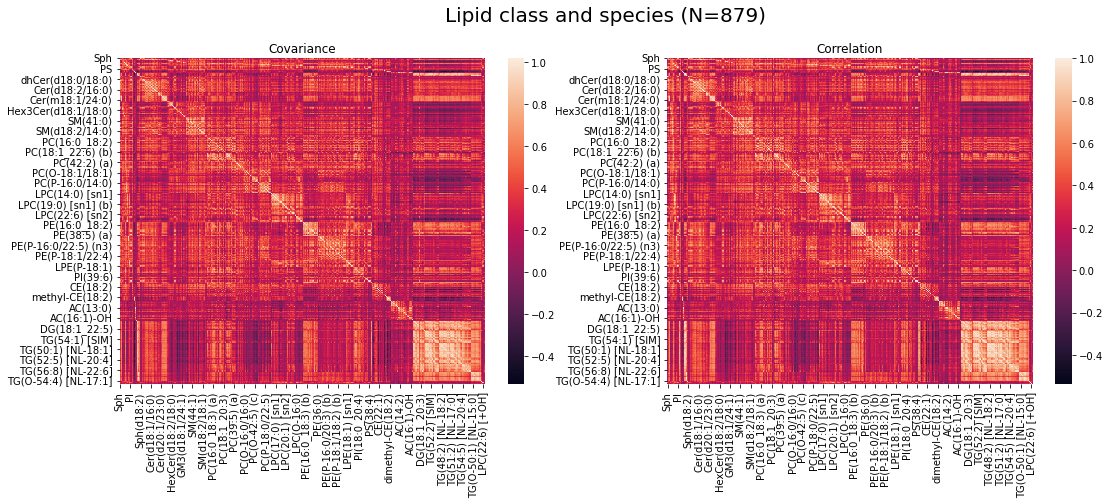

In [2]:
# Load lipidomics data used for GWAS (so INVed lipid measures)
lip_class = '/data100t1/home/wanying/CCHC/lipidomics/input_docs/lipidomic_measures/lipid_class_INVed_covar.txt'
lip_species = '/data100t1/home/wanying/CCHC/lipidomics/input_docs/lipidomic_measures/lipid_species_INVed_covar.txt'
df_class = pd.read_csv(lip_class,sep='\t')
df_species = pd.read_csv(lip_species,sep='\t')
print(df_class.shape, df_species.shape)
df_all = df_class.iloc[:,[0]+list(np.arange(32, df_class.shape[1]))].merge(df_species.iloc[:,[0]+list(np.arange(32, df_species.shape[1]))], on='RRID')
print('# Merged df', df_all.shape)

display(df_all.head(2))

# Calcualte covariance matrix (cov in R)
cov_vals = df_all.iloc[:, 1:].cov()
print('# Covariance')
display(cov_vals.head(2))

# Calcualte correlations
corr_vals = df_all.iloc[:, 1:].corr()
print('# Correlation')
display(corr_vals.head(2))

fig, ax = plt.subplots(figsize=(18, 6), ncols=2)
sns.heatmap(data=cov_vals, ax=ax[0])
ax[0].set_title('Covariance')
sns.heatmap(data=corr_vals, ax=ax[1])
ax[1].set_title('Correlation')
fig.suptitle('Lipid class and species (N=879)', y=1, fontsize=20)

In [12]:
# Perform PCA on the original data
print('# ###### PCA on original matrix ######')
pca = PCA()
pca.fit(df_all.iloc[:, 1:])
# Find number of independent test by variance explained
var_explained_sum, count = 0, 0
threshold = 0.95
for val in pca.explained_variance_ratio_:
    var_explained_sum += val
    count += 1
    if var_explained_sum >= threshold:
        break
print('# ------ Cadby 2022 paper ------')
print(f'# Effective number of independent tests (number of variance explained by PCs>{threshold}):', count)

# Calcualte effective size of traits
# Refer to paper: Wang, 2019. doi: 10.1126/sciadv.aaw3538
total, squared_sum = 0, 0
for val in pca.explained_variance_:
    total += val
    squared_sum += val**2
print('# Effective number of independent tests (by PCA eigen values):', int(total**2/squared_sum)) 



# Perform PCA on the covariance matrix
print('\n# ###### PCA on covariance matrix ######')
pca = PCA()
pca.fit(cov_vals)
# Find number of independent test by variance explained
var_explained_sum, count = 0, 0
threshold = 0.95
for val in pca.explained_variance_ratio_:
    var_explained_sum += val
    count += 1
    if var_explained_sum >= threshold:
        break
print(f'# Effective number of independent tests (number of variance explained by PCs>{threshold}):', count)


# Calcualte effective size of traits
# Refer to paper: Wang, 2019. doi: 10.1126/sciadv.aaw3538
total, squared_sum = 0, 0
for val in pca.explained_variance_:
    total += val
    squared_sum += val**2
print('# Effective number of independent tests (by PCA eigen values):', int(total**2/squared_sum))  

# ###### PCA on original matrix ######
# ------ Cadby 2022 paper ------
# Effective number of independent tests (number of variance explained by PCs>0.95): 123
# Effective number of independent tests (by PCA eigen values): 7

# ###### PCA on covariance matrix ######
# Effective number of independent tests (number of variance explained by PCs>0.95): 10
# Effective number of independent tests (by PCA eigen values): 3


In [215]:
# If use eigen decoposition instead of PCA
# Reference: https://cmp.phys.ufl.edu/files/matrix-diagonalization.html

# Find covariance_matrix = Q Λ Q'
eigen_values, eigen_vectors = np.linalg.eig(cov_vals) # Return eigen values and vectors
D = np.diag(eigen_values)
R = eigen_vectors
# np.dot(R, np.dot(D, np.linalg.inv(R))) # Should be the same as cov_vals


# Calcualte effective size of traits
# Refer to paper: Wang, 2019. doi: 10.1126/sciadv.aaw3538
total, squared_sum = 0, 0
for val in eigen_values:
    total += val
    squared_sum += val**2
print('# Effective number of independent tests (eigen decomposition):', int(total**2/squared_sum))  


# Effective number of independent tests (eigen decomposition): 8


/tmp/ipykernel_1869165/1106732860.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  print('# Effective number of independent tests (eigen decomposition):', int(total**2/squared_sum))


#### * Might be affected by relatedness. So only take the unrelated samples and re-estimate 

In [3]:
df_unrelate = pd.read_csv('/data100t1/home/wanying/CCHC/lipidomics/input_docs/primus/primus_rel_3/plink.genome_maximum_independent_set', sep='\t')
df_unrelate['RRID'] = df_unrelate['FID'].apply(lambda x: x.split('_')[0])
# df_unrelate.head(2)

df_unrelate_merged = df_all.merge(df_unrelate[['RRID']], on='RRID')
display(df_unrelate_merged.head(2))

# Calcualte covariance matrix (cov in R)
cov_vals = df_unrelate_merged.iloc[:, 1:].cov()
print('# Covariance')
display(cov_vals.head(2))

,RRID,Sph,S1P,dhCer,Cer(d),Cer(m),C1P,HexCer,Hex2Cer,Hex3Cer,...,TG(O-54:4) [NL-18:2],Ubiquinone_y,CE(18:2) [+OH],CE(20:4) [+OH],LPC(18:2) [+OH],LPC(20:4) [+OH],LPC(22:6) [+OH],PC(34:2) [+OH],PC(36:4) [+OH],PC(38:6) [+OH]
0,BD0009,0.22904,1.343351,1.720340,0.559307,0.692574,1.162851,-0.016075,1.694447,0.719645,...,0.321944,0.549934,1.309454,1.072787,0.444178,0.235233,-0.211541,0.621503,-0.326179,-0.494658
1,BD0058,2.98827,1.848507,0.911705,0.896586,0.114783,1.386707,1.025749,1.055093,0.214624,...,-0.298751,0.348513,1.302383,1.641946,1.109221,1.645826,1.575982,-0.663494,1.005556,0.128953


# Covariance


,Sph,S1P,dhCer,Cer(d),Cer(m),C1P,HexCer,Hex2Cer,Hex3Cer,GM3,...,TG(O-54:4) [NL-18:2],Ubiquinone_y,CE(18:2) [+OH],CE(20:4) [+OH],LPC(18:2) [+OH],LPC(20:4) [+OH],LPC(22:6) [+OH],PC(34:2) [+OH],PC(36:4) [+OH],PC(38:6) [+OH]
Sph,0.966742,0.602249,0.526037,0.309935,0.237704,0.002648,0.050547,0.450996,0.192742,0.291667,...,0.110273,0.199479,0.052691,0.035768,0.509535,0.672357,0.647792,0.039469,0.122806,0.044494
S1P,0.602249,0.944226,0.481130,0.383894,0.264847,0.126520,0.202506,0.491713,0.283595,0.376934,...,0.166026,0.279345,0.155772,0.187906,0.391143,0.495320,0.440824,0.112364,0.200976,0.137629


In [7]:
# ########### PCA on org data ###############
# Perform PCA on the covariance matrix
pca = PCA()
pca.fit(df_all.iloc[:, 1:])
# pca = PCA()
# pca.fit(df_all.iloc[:, 1:])


# Find number of independent test by variance explained
var_explained_sum, count = 0, 0
threshold = 0.95
for val in pca.explained_variance_ratio_:
    var_explained_sum += val
    count += 1
    if var_explained_sum >= threshold:
        break
# Cadby, 2022 paper
print(f'# Effective number of independent tests (number of variance explained by PCs>{threshold}):', count)


# Calcualte effective size of traits
# Refer to paper: Wang, 2019. doi: 10.1126/sciadv.aaw3538
total, squared_sum = 0, 0
for val in pca.explained_variance_:
    total += val
    squared_sum += val**2
print('# Effective number of independent tests', int(total**2/squared_sum))  

# Effective number of independent tests (number of variance explained by PCs>0.95): 123
# Effective number of independent tests 7


In [4]:
# Perform PCA on the covariance matrix
pca = PCA()
pca.fit(cov_vals)
# pca = PCA()
# pca.fit(df_all.iloc[:, 1:])


# Find number of independent test by variance explained
var_explained_sum, count = 0, 0
threshold = 0.95
for val in pca.explained_variance_ratio_:
    var_explained_sum += val
    count += 1
    if var_explained_sum >= threshold:
        break
print(f'# Effective number of independent tests (number of variance explained by PCs>{threshold}):', count)


# Calcualte effective size of traits
# Refer to paper: Wang, 2019. doi: 10.1126/sciadv.aaw3538
total, squared_sum = 0, 0
for val in pca.explained_variance_:
    total += val
    squared_sum += val**2
print('# Effective number of independent tests', int(total**2/squared_sum))  

# Effective number of independent tests (number of variance explained by PCs>0.95): 10
# Effective number of independent tests 3


In [5]:
# Use eigen decoposition instead of PCA
# Reference: https://cmp.phys.ufl.edu/files/matrix-diagonalization.html

# Find covariance_matrix = Q Λ Q'
eigen_values, eigen_vectors = np.linalg.eig(cov_vals) # Return eigen values and vectors
D = np.diag(eigen_values)
R = eigen_vectors
# np.dot(R, np.dot(D, np.linalg.inv(R))) # Should be the same as cov_vals


# Calcualte effective size of traits
# Refer to paper: Wang, 2019. doi: 10.1126/sciadv.aaw3538
total, squared_sum = 0, 0
for val in eigen_values:
    total += val
    squared_sum += val**2
print('# Effective number of independent tests (eigen decomposition):', int(total**2/squared_sum))  


# Effective number of independent tests (eigen decomposition): 8


/tmp/ipykernel_56469/462199453.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  print('# Effective number of independent tests (eigen decomposition):', int(total**2/squared_sum))


#### So, relatedness did not affect effective number of independent test. Decide to use 123 for Bonferroni correction. Method refer to Cadby 2022 paper

#### (1) BF correction for effective size of independent test
N=123

In [4]:
n_tests = 123
pval_threshold = 5e-8/n_tests
print(f'# Study-wide pval threshold is: {pval_threshold}')

# Study-wide pval threshold is: 4.065040650406504e-10


In [19]:
# Lipid class
filter_snp_by_pval_threshold(pval_threshold=pval_threshold,
                             path='/data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS_snps_pval_1e-5',
                             output_fn='/data100t1/home/wanying/CCHC/lipidomics/output/lipidomics_GWAS_significant_SNPs/lipid_class_bmi_age_age2_sex_pc.significant_SNPs.BF_corrected_by_effective_size.txt',
                             overwrite=False)
# Lipid species
filter_snp_by_pval_threshold(pval_threshold=pval_threshold,
                             path='/data100t1/home/wanying/CCHC/lipidomics/output/lip_species_GWAS_snps_pval_1e-5',
                             output_fn='/data100t1/home/wanying/CCHC/lipidomics/output/lipidomics_GWAS_significant_SNPs/lipid_species_bmi_age_age2_sex_pc.significant_SNPs.BF_corrected_by_effective_size.txt',
                             overwrite=False)

# Number of files processed: 49/49    
# DONE
# Number of files processed: 830/830    
# DONE


In [5]:
# On results from model: trait ~ SNP + sex + age + PC1-5 (No BMI and age2)
# Lipid class
filter_snp_by_pval_threshold(pval_threshold=pval_threshold,
                             path='/data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS_noadj_BMI_AGE2_snps_pval_1e-5',
                             output_fn='/data100t1/home/wanying/CCHC/lipidomics/output/lipidomics_GWAS_significant_SNPs/lipid_class_age_sex_pc.significant_SNPs.BF_corrected_by_effective_size.txt',
                             overwrite=False)
# Lipid species
filter_snp_by_pval_threshold(pval_threshold=pval_threshold,
                             path='/data100t1/home/wanying/CCHC/lipidomics/output/lip_species_GWAS_noadj_BMI_AGE2_snps_pval_1e-5',
                             output_fn='/data100t1/home/wanying/CCHC/lipidomics/output/lipidomics_GWAS_significant_SNPs/lipid_species_age_sex_pc.significant_SNPs.BF_corrected_by_effective_size.txt',
                             overwrite=False)

# Number of files processed: 48/48    
# DONE
# Number of files processed: 830/830    
# DONE
